# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Monte Carlo - random generator



# What is Monte Carlo simulation?
<hr style = "border:2px solid black" ></hr>


- **Origin**: It was invented by John von Neumann, Stanisław Ulam, and Nicholas Metropolis, who were employed on a secret assignment in the Los Alamos National Laboratory, while working on a nuclear weapon project called the Manhattan Project. It was named after a well-known casino town called Monaco, since chance and randomness are core to the modeling approach, similar to a game of roulette.

- **What does it do?** A Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. 
    
- **Where is it used?** It is used to understand the impact of risk and uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

- **The link with stochastics modelling** We generally have two strategies to chose from: we have data  and we can do supervised learning or we do not. In the latter case, we could use random variables (stochastic modelling) which forecasts the probability of various outcomes under different conditions (your inputs). MCS is one example of stochastic model.
    
- **Why not using DoE?** One approach that can produce a better understanding of the range of potential outcomes and help avoid the “flaw of averages” is a Monte Carlo simulation. In a DoE experiment you do not get the probability of the events you are studying.
    
- **Further** It can be used to simulate risk and uncertainty that can affect the outcome of different decision options. If there are *too many* variables affecting the outcome, then it can simulate them and find the optimal based on the values. MCS are used to model the probability of different outcomes in a process that cannot easily be predicted *due to* the intervention of random variables. It is a technique used to understand *the impact of* risk and uncertainty in prediction and forecasting models.



# Randomness and computers
<hr style = "border:2px solid black" ></hr>


- While psuedorandom numbers are generated by a deterministic algorithm, we can mostly treat them as if they were true random numbers and we **will drop** the “pseudo” prefix. 

- Fundamentally, the algorithm generates random integers which are then normalized to give a floating point number from the standard uniform distribution. 

- Random numbers from other distributions are in turn generated using these uniform random deviates, either via general (inverse transform, accept/reject, mixture repreentations) or specialized ad-hoc (e.g. Box-Muller) methods.



# Imports
<hr style = "border:2px solid black" ></hr>

In [43]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns
import numpy.random as npr
import scipy.stats as ss

# Linear congruential generators (LCG)
<hr style = "border:2px solid black" ></hr>


- The seed allows us to have a reproducible sequence of “random” numbers



In [18]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m


# setting the seed
rng.current = 1

[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

# Inverst transform method
<hr style = "border:2px solid black" ></hr>

In [25]:
def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

In [26]:
def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

In [27]:
def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

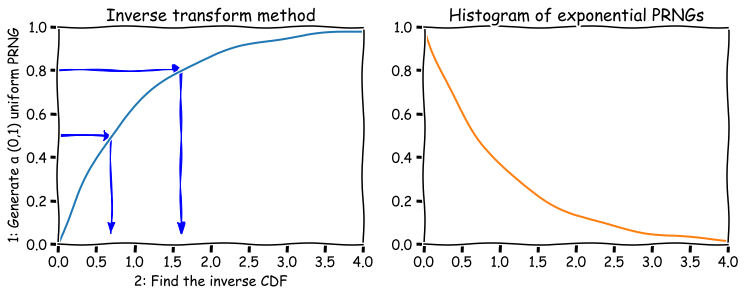

In [31]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate a (0,1) uniform PRNG')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histogram of exponential PRNGs');

# Box-Muller for generating
<hr style = "border:2px solid black" ></hr>


- The Box-Muller transform starts wtih 2 random uniform numbers u and v 

- Generate an exponentailly distributed variable r2 from u using the inverse transform method 

- This means that r is an exponentially distributed variable on (0,∞) - Generate a variable θ unformly distributed on (0,2π) from v by scaling 
    
- In polar coordinates, the vector (r,θ) has an indepdendent bivariate normal distribution 

- Hence the projection onto the x and y axes give independent univarate normal random numbers



In [35]:
n = 1000
u1 = np.random.random(n)
u2 = np.random.random(n)
r_squared = -2*np.log(u1)
r = np.sqrt(r_squared)
theta = 2*np.pi*u2
x = r*np.cos(theta)
y = r*np.sin(theta)

/opt/anaconda3/envs/trainingAI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


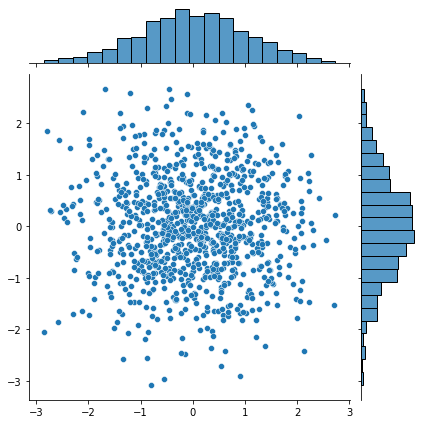

In [36]:
sns.jointplot(x, y, kind='scatter')

# Using `numpy` and `scipy` random generator
<hr style = "border:2px solid black" ></hr>


- From this part onwards, we will assume that there is a library of PRNGs that we can use - either from numpy.random or scipy.stats which are both based on the **Mersenne Twister**, a high-quality PRNG for random integers. 

- The numpy versions simply generate ranodm deviates while the scipy versions will also provide useful functions related to the distribution, e.g. PDF, CDF and quantiles.

    


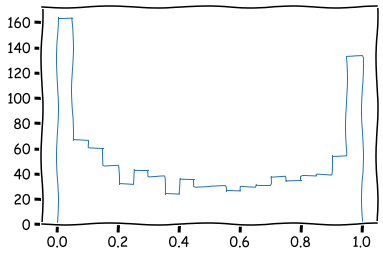

In [39]:
rs = npr.beta(a=0.5, b=0.5, size=1000)
with plt.xkcd():
    plt.hist(rs, bins=20, histtype='step', linewidth=1);

In [42]:
n = 5
xs = [0.1, 0.5, 0.9]
rv = ss.beta(a=0.5, b=0.5)

print(rv.pdf(xs)) # equivalent of dbeta
print(rv.cdf(xs)) # equivalent of pbeta
print(rv.ppf(xs)) # equvialent of qbeta
print(rv.rvs(n)) # equivalent of rbeta

[1.06103295 0.63661977 1.06103295]
[0.20483276 0.5        0.79516724]
[0.02447174 0.5        0.97552826]
[0.81946218 0.01124742 0.35220395 0.17144985 0.03027006]


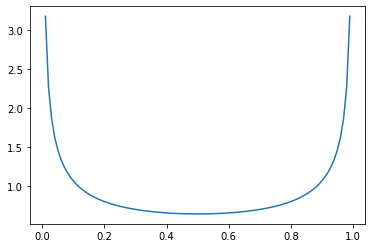

In [44]:
# And here is a plot of the PDF for the beta distribution
xs = np.linspace(0, 1, 100)
plt.plot(xs, ss.beta.pdf(xs, a=0.5, b=0.5))

# References
<hr style = "border:2px solid black" ></hr>


- https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html
    
